In [22]:
from src.tools.prepare_dataset import prepare_dataset
from src.network.customics import CustOMICS
from src.tools.utils import get_sub_omics_df, get_common_samples
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch

In [17]:
cohort = 'TCGA-BRCA'
omic_sources = ['CNV','RNAseq','miRNA','methyl']
label='PAM50'
event, surv_time = "status", "days"

In [3]:
omics_df = {}
cnv_path = 'TCGA/{}/{}_CNV.csv'.format(cohort,cohort)
rna_path = 'TCGA/{}/{}_mRNA.csv'.format(cohort,cohort)
mirna_path = 'TCGA/{}/{}_miRNA.csv'.format(cohort,cohort)
methyl_path = 'TCGA/{}/{}_Methy.csv'.format(cohort,cohort)
clinical_path = 'TCGA/{}/Clinical_Data.csv'.format(cohort,cohort)
if 'CNV' in omic_sources:
    omics_df['CNV'] = pd.read_csv(cnv_path, sep=',', index_col=0).T.dropna(axis=1)
    omics_df['CNV'].index = omics_df['CNV'].index.str.replace('.', '-', regex=False)
if 'RNAseq' in omic_sources:
    omics_df['RNAseq'] = pd.read_csv(rna_path, sep=',', index_col=0).T.dropna(axis=1)
    omics_df['RNAseq'].index = omics_df['RNAseq'].index.str.replace('.', '-', regex=False)
if 'miRNA' in omic_sources:
    omics_df['miRNA'] = pd.read_csv(mirna_path, sep=',', index_col=0).T.dropna(axis=1)
    omics_df['miRNA'].index = omics_df['miRNA'].index.str.replace('.', '-', regex=False)
if 'methyl' in omic_sources:
    omics_df['methyl'] = pd.read_csv(methyl_path, sep=',', index_col=0).T.dropna(axis=1)
    omics_df['methyl'].index = omics_df['methyl'].index.str.replace('.', '-', regex=False)
clinical_df = pd.read_csv(clinical_path, sep=',', index_col=0)
clinical_df = clinical_df[clinical_df['status'].notna()]
clinical_df = clinical_df[clinical_df['days'].notna()]
if cohort == 'TCGA-BRCA':
    clinical_df = clinical_df[clinical_df[label].notna()]
lt_samples = get_common_samples([df for df in omics_df.values()] + [clinical_df])
for source in omics_df.keys():
    omics_df[source] = omics_df[source].loc[lt_samples, :]

In [5]:
lt_samples = list(clinical_df.index)

In [6]:
samples_train, samples_test = train_test_split(lt_samples, test_size=0.2)
samples_train, samples_val = train_test_split(samples_train, test_size=0.2)

In [7]:
omics_train = get_sub_omics_df(omics_df, samples_train)
omics_val = get_sub_omics_df(omics_df, samples_val)
omics_test = get_sub_omics_df(omics_df, samples_test)


x_dim = [omics_df[omic_source].shape[1] for omic_source in omics_df.keys()]

In [8]:
#hyperparameters
dropout = 0.2
beta = 1
classifier_dim = [256, 128]
survival_dim = [64, 32]
lambda_classif = 5
lambda_survival = 0
train_params = {"switch": 5, "lr": 1e-3}

Subtype counts in lt_samples: {'LumA': 352, 'LumB': 132, 'Basal': 113, 'Her2': 42, 'Normal': 31}
['Basal' 'LumA' 'LumA' 'Her2' 'LumB' 'Normal' 'LumB' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumB' 'LumB' 'LumA' 'LumA' 'Basal' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumA' 'Basal' 'Basal' 'LumB' 'Her2' 'Basal' 'LumA' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Normal'
 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Normal' 'LumA' 'LumA' 'Her2' 'LumA'
 'LumA' 'LumB' 'LumA' 'Basal' 'Basal' 'LumA' 'Basal' 'LumA' 'LumB' 'LumA'
 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Her2' 'LumA' 'Basal' 'Basal' 'LumB'
 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'LumA' 'Basal' 'Basal' 'LumA' 'LumA'
 'Her2' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA'
 'Basal' 'Basal' 'Normal' 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'Basal'
 'LumB' 'LumB' 'LumA' 'LumB' 'LumB' 'LumA' 'Normal' 'Basal' 'LumA' 'LumA'
 'LumB' 'Basal' 'LumB' 'LumB

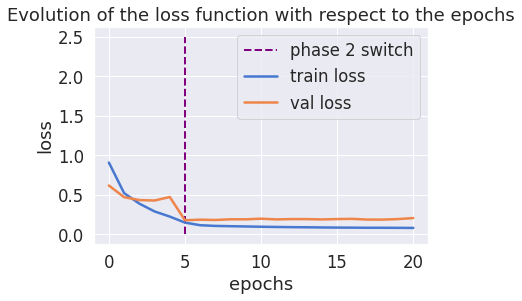

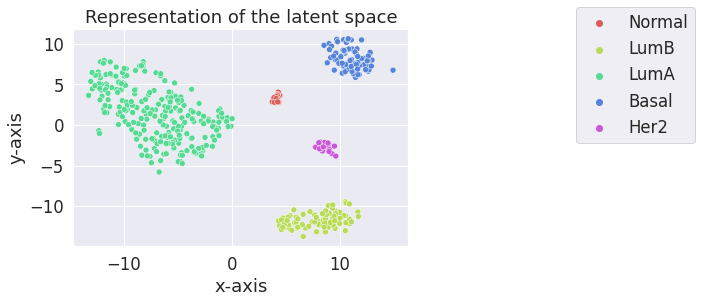

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


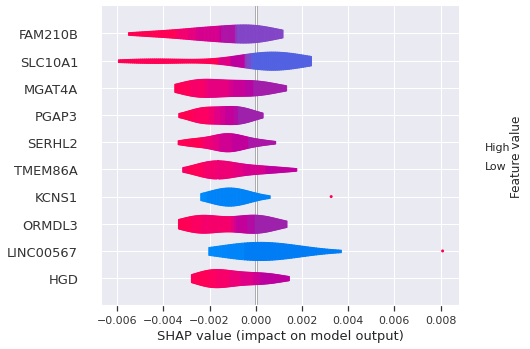

<Figure size 432x288 with 0 Axes>

Subtype counts in lt_samples: {'LumA': 352, 'LumB': 132, 'Basal': 113, 'Her2': 42, 'Normal': 31}
['Basal' 'LumA' 'LumA' 'Her2' 'LumB' 'Normal' 'LumB' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumB' 'LumB' 'LumA' 'LumA' 'Basal' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumA' 'Basal' 'Basal' 'LumB' 'Her2' 'Basal' 'LumA' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Normal'
 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Normal' 'LumA' 'LumA' 'Her2' 'LumA'
 'LumA' 'LumB' 'LumA' 'Basal' 'Basal' 'LumA' 'Basal' 'LumA' 'LumB' 'LumA'
 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Her2' 'LumA' 'Basal' 'Basal' 'LumB'
 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'LumA' 'Basal' 'Basal' 'LumA' 'LumA'
 'Her2' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA'
 'Basal' 'Basal' 'Normal' 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'Basal'
 'LumB' 'LumB' 'LumA' 'LumB' 'LumB' 'LumA' 'Normal' 'Basal' 'LumA' 'LumA'
 'LumB' 'Basal' 'LumB' 'LumB

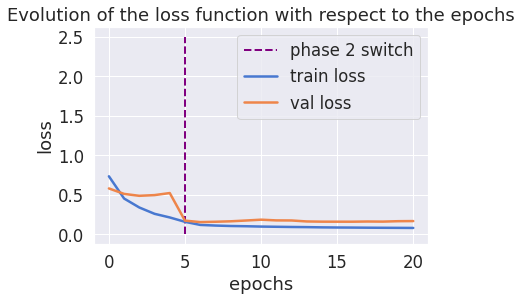

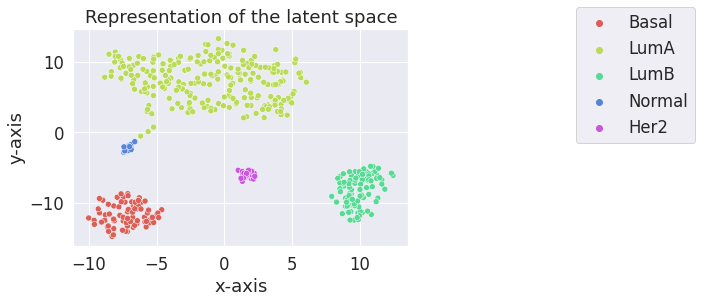

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


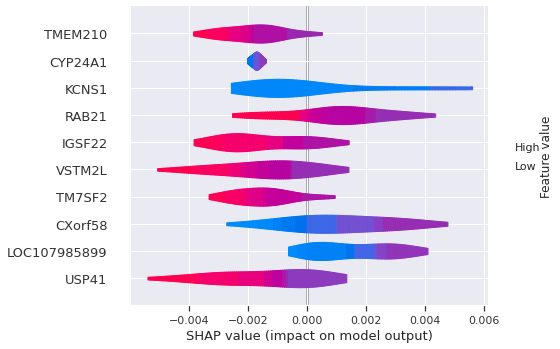

<Figure size 432x288 with 0 Axes>

Subtype counts in lt_samples: {'LumA': 352, 'LumB': 132, 'Basal': 113, 'Her2': 42, 'Normal': 31}
['Basal' 'LumA' 'LumA' 'Her2' 'LumB' 'Normal' 'LumB' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumB' 'LumB' 'LumA' 'LumA' 'Basal' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumA' 'Basal' 'Basal' 'LumB' 'Her2' 'Basal' 'LumA' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Normal'
 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Normal' 'LumA' 'LumA' 'Her2' 'LumA'
 'LumA' 'LumB' 'LumA' 'Basal' 'Basal' 'LumA' 'Basal' 'LumA' 'LumB' 'LumA'
 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Her2' 'LumA' 'Basal' 'Basal' 'LumB'
 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'LumA' 'Basal' 'Basal' 'LumA' 'LumA'
 'Her2' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA'
 'Basal' 'Basal' 'Normal' 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'Basal'
 'LumB' 'LumB' 'LumA' 'LumB' 'LumB' 'LumA' 'Normal' 'Basal' 'LumA' 'LumA'
 'LumB' 'Basal' 'LumB' 'LumB

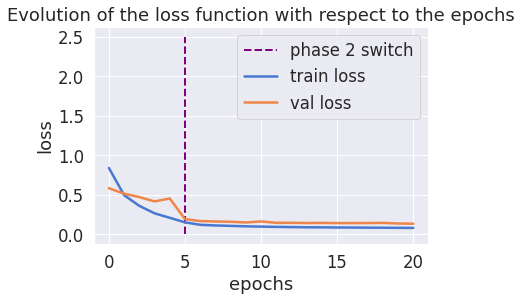

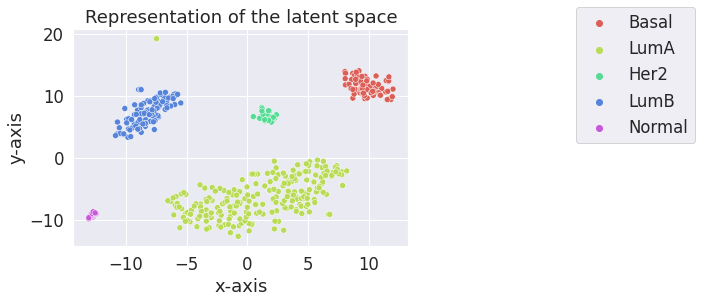

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


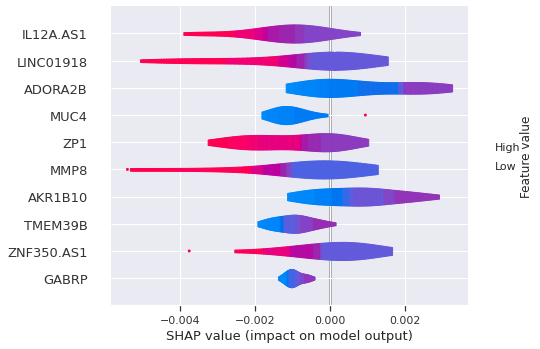

<Figure size 432x288 with 0 Axes>

Subtype counts in lt_samples: {'LumA': 352, 'LumB': 132, 'Basal': 113, 'Her2': 42, 'Normal': 31}
['Basal' 'LumA' 'LumA' 'Her2' 'LumB' 'Normal' 'LumB' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumB' 'LumB' 'LumA' 'LumA' 'Basal' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumA' 'Basal' 'Basal' 'LumB' 'Her2' 'Basal' 'LumA' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Normal'
 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Normal' 'LumA' 'LumA' 'Her2' 'LumA'
 'LumA' 'LumB' 'LumA' 'Basal' 'Basal' 'LumA' 'Basal' 'LumA' 'LumB' 'LumA'
 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Her2' 'LumA' 'Basal' 'Basal' 'LumB'
 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'LumA' 'Basal' 'Basal' 'LumA' 'LumA'
 'Her2' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA'
 'Basal' 'Basal' 'Normal' 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'Basal'
 'LumB' 'LumB' 'LumA' 'LumB' 'LumB' 'LumA' 'Normal' 'Basal' 'LumA' 'LumA'
 'LumB' 'Basal' 'LumB' 'LumB

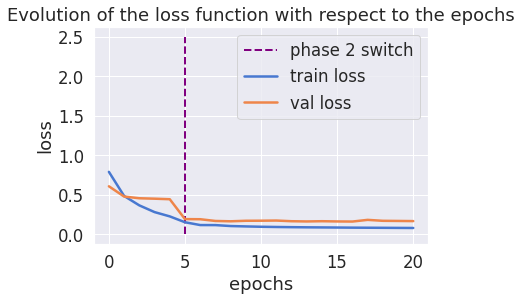

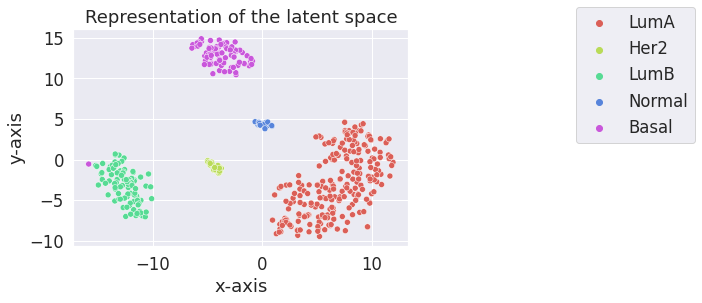

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


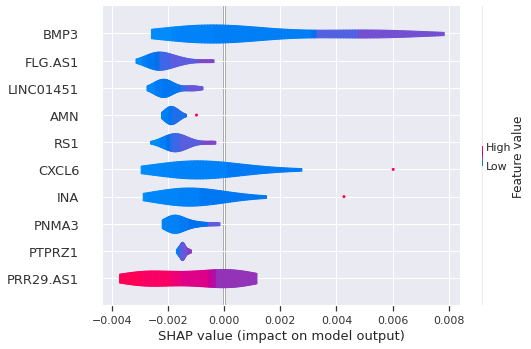

<Figure size 432x288 with 0 Axes>

Subtype counts in lt_samples: {'LumA': 352, 'LumB': 132, 'Basal': 113, 'Her2': 42, 'Normal': 31}
['Basal' 'LumA' 'LumA' 'Her2' 'LumB' 'Normal' 'LumB' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumB' 'LumB' 'LumA' 'LumA' 'Basal' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA'
 'LumA' 'Basal' 'Basal' 'LumB' 'Her2' 'Basal' 'LumA' 'Basal' 'LumA' 'LumA'
 'LumB' 'LumA' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Normal'
 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Normal' 'LumA' 'LumA' 'Her2' 'LumA'
 'LumA' 'LumB' 'LumA' 'Basal' 'Basal' 'LumA' 'Basal' 'LumA' 'LumB' 'LumA'
 'LumA' 'LumA' 'LumA' 'LumA' 'LumA' 'Her2' 'LumA' 'Basal' 'Basal' 'LumB'
 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'LumA' 'Basal' 'Basal' 'LumA' 'LumA'
 'Her2' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'LumB' 'LumA' 'LumA' 'LumA'
 'Basal' 'Basal' 'Normal' 'LumA' 'Basal' 'LumA' 'LumA' 'LumA' 'Basal'
 'LumB' 'LumB' 'LumA' 'LumB' 'LumB' 'LumA' 'Normal' 'Basal' 'LumA' 'LumA'
 'LumB' 'Basal' 'LumB' 'LumB

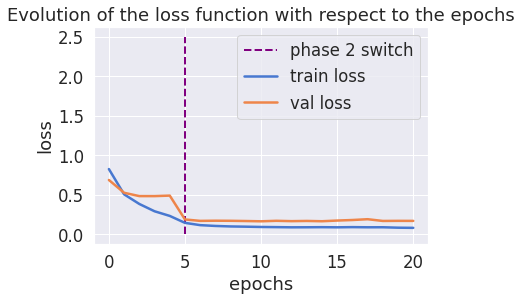

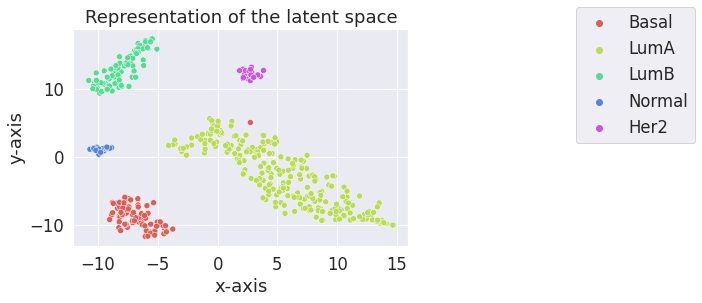

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


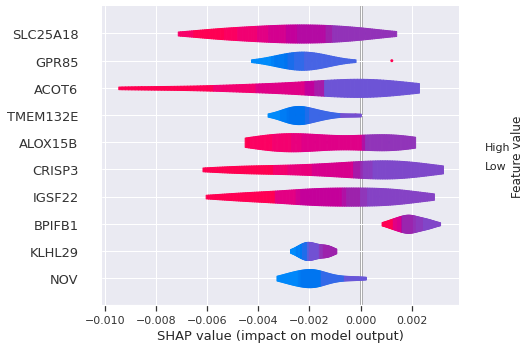

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

all_metrics = []
for split in range(1, 6):
    omics_df, clinical_df, omics_train, omics_val, omics_test, lt_samples, x_dim = prepare_dataset(
        cohort="TCGA-BRCA", sources=omic_sources, n_split=split, save_split=True, label=label
    )
    if label in clinical_df.columns:
        phenotype = clinical_df.loc[lt_samples, :]
        print("Subtype counts in lt_samples:", phenotype[label].value_counts().to_dict())
    print(clinical_df[label].values)
    num_classes = len(np.unique(clinical_df[label].values))
    # hyperparameters
    hidden_dim = [512, 256]
    central_dim = [512, 256]
    rep_dim = 128
    latent_dim = 128

    source_params = {}
    central_params = {"hidden_dim": central_dim, "latent_dim": latent_dim, "norm": True, "dropout": dropout, "beta": beta}
    print("omic_sources:", omic_sources)
    print("x_dim:", x_dim, "len:", len(x_dim))
    print("omics_df keys:", list(omics_df.keys()))

    for i, source in enumerate(omic_sources):
        source_params[source] = {'input_dim': x_dim[i], 'hidden_dim': hidden_dim,
                                 'latent_dim': rep_dim, 'norm': True, 'dropout': 0.2}

    classif_params = {"n_class": num_classes, "lambda": lambda_classif, "hidden_layers": classifier_dim, "dropout": dropout}
    surv_params = {"lambda": lambda_survival, "dims": survival_dim, "activation": "SELU", "l2_reg": 1e-2, "norm": True, "dropout": dropout}

    model = CustOMICS(source_params, central_params, classif_params, surv_params, train_params, device=device).to(device)
    model.get_number_parameters()
    model.fit(omics_train, clinical_df, label, event, surv_time, omics_val = omics_val,
              batch_size=32, n_epochs=21, verbose=True)

    metric = model.evaluate(omics_test, clinical_df, label, event, surv_time,
                            task="classification", batch_size=1024, plot_roc=False)
    all_metrics.append(metric)
    print(f"split {split}: {metric}")
    model.plot_loss()
    model.plot_representation(omics_train, clinical_df, label,
                              'plot_representation', 'Representation of the latent space')
    model.explain(sample_id=lt_samples, omics_df=omics_df, clinical_df=clinical_df,
                  source="RNAseq", subtype="Her2", label=label, device=device, show=True)


In [23]:
model.get_latent_representation(omics_df)

array([[-0.622195  ,  0.53947806, -2.1883576 , ...,  0.11118112,
        -0.13775575, -0.42922854],
       [ 0.02071554,  0.12961526,  0.68141747, ...,  0.0949661 ,
        -0.15008253,  0.0864497 ],
       [ 0.02617212,  0.1453089 ,  0.8375738 , ...,  0.16430014,
        -0.23252094,  0.10422496],
       ...,
       [-0.34870473,  0.44084096, -0.6967575 , ...,  0.24052557,
        -0.29864362,  0.35762966],
       [-0.03306975,  0.12610571,  0.6883152 , ...,  0.0924895 ,
        -0.17135215,  0.12908147],
       [ 0.06995027,  0.09580302,  0.72932875, ...,  0.02930461,
        -0.1353679 ,  0.02610184]], dtype=float32)

In [24]:
from src.ex_vae.shap_vae import processPhenotypeDataForSamples
expr_df = omics_df['methyl']
sample_id_filtered = list(set(lt_samples) & set(expr_df.index))
phenotype = processPhenotypeDataForSamples(clinical_df, sample_id_filtered, model.label_encoder)
conditionaltumour = phenotype.loc[:, 'PAM50'] == 'Her2' 

print("n sample_id provided:", len(lt_samples))
print("n after intersection:", len(sample_id_filtered))
print("n matching subtype:", conditionaltumour.sum())


n sample_id provided: 670
n after intersection: 670
n matching subtype: 42


In [25]:
print("raw PAM50 counts:\n", clinical_df['PAM50'].value_counts())
print("encoded -> original mapping:", list(zip(model.label_encoder.transform(model.label_encoder.classes_), model.label_encoder.classes_)))


raw PAM50 counts:
 LumA      352
LumB      132
Basal     113
Her2       42
Normal     31
Name: PAM50, dtype: int64
encoded -> original mapping: [(0, 'Basal'), (1, 'Her2'), (2, 'LumA'), (3, 'LumB'), (4, 'Normal')]


In [26]:
model.explain(lt_samples, omics_test, clinical_df, 'methyl', 'LumB', 'PAM50', device, show=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x19049 and 18206x512)

In [ ]:
model.explain(lt_samples, omics_test, clinical_df, 'CNV', 'Her2', 'PAM50', device, show=True)

In [ ]:
model.explain(lt_samples, omics_test, clinical_df, 'RNAseq', 'LumA', 'PAM50', device, show=True)

In [ ]:
from src.tools.utils import save_plot_score
z = model.get_latent_representation(omics_df=omics_test)
save_plot_score('latent_tsne', z, clinical_df.loc[omics_test[next(iter(omics_test))].index, label].values,
                title='Latent t-SNE by label', show=True)


In [ ]:
model.plot_representation(
    omics_df=omics_test,      
    clinical_df=clinical_df,
    labels=label,                # e.g., 'PAM50'
    filename='plot_representation',
    title='Visualization of the latent representation for the TCGA-BRCA cohort',
    show=True
)
